In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Câu a: f0 = 1/50, N = 200, Nbits = 64, 128, 256

In [5]:
N = 200
f0 = 1 / 50
n = np.arange(N)
xn = np.sin(2 * math.pi * f0 * n)

plt.figure(figsize=(16, 12))

def quantizeandplot(typeofq, nofbit):  #typeofq = 0 nghĩa là truncation, typeofq = 1 nghĩa là rounding
    if typeofq == 0:                        #nofbits là số mức lượng tử
        delta = 2 / nofbit 
        xqn = (np.trunc(xn*nofbit)/ nofbit)  #TRUNCATION nên sử dụng np.floor
        en = xqn - xn
        
        plt.subplot(3, 1, 1)
        plt.stem(n, xn, "b-")
        plt.title("USING TRUNCATION Quantization level = %d, x(n)" %nofbit)
        
        plt.subplot(3, 1, 2)
        plt.stem(n, xqn, "m")
        plt.plot(n, xn, "b-")                #Để so sánh với tín hiệu x(n)
        plt.title("USING TRUNCATION Quantization level = %d, $x_q$(n)" %nofbit)
        
        plt.subplot(3, 1, 3)
        plt.stem(n, en, "m")
        plt.title("USING TRUNCATION Quantization level = %d, e(n)" %nofbit)
        
        P_Q = np.sum(en*en) / N
        P_X = 1 / 2
        sqnr = P_X / P_Q
        print("SQNR =",sqnr)
    if typeofq == 1:
        delta = 2 / (nofbit - 1)
        xqn = (xn + 1) / delta
        xqn = (np.round(xqn) - 1 / delta) * delta    #ROUNDING nên sử dụng np.round
        en = xqn - xn
        
        plt.subplot(3, 1, 1)
        plt.stem(n, xn, "b-")
        plt.title("USING ROUNDING Quantization level = %d, x(n)" %nofbit)
        
        plt.subplot(3, 1, 2)
        plt.stem(n, xqn, "m")
        plt.plot(n, xn, "b-")             #Để so sánh với tín hiệu x(n)
        plt.title("USING ROUNDING Quantization level = %d, $x_q$(n)" %nofbit)
        
        plt.subplot(3, 1, 3)
        plt.stem(n, en, "m")
        plt.title("USING ROUNDING Quantization level = %d, e(n)" %nofbit)
        
        P_Q = np.sum(en*en) / N
        P_X = 1 / 2
        sqnr = P_X / P_Q
        print("SQNR =",sqnr)        

<Figure size 1152x864 with 0 Axes>

SQNR = 1391.6281094937399


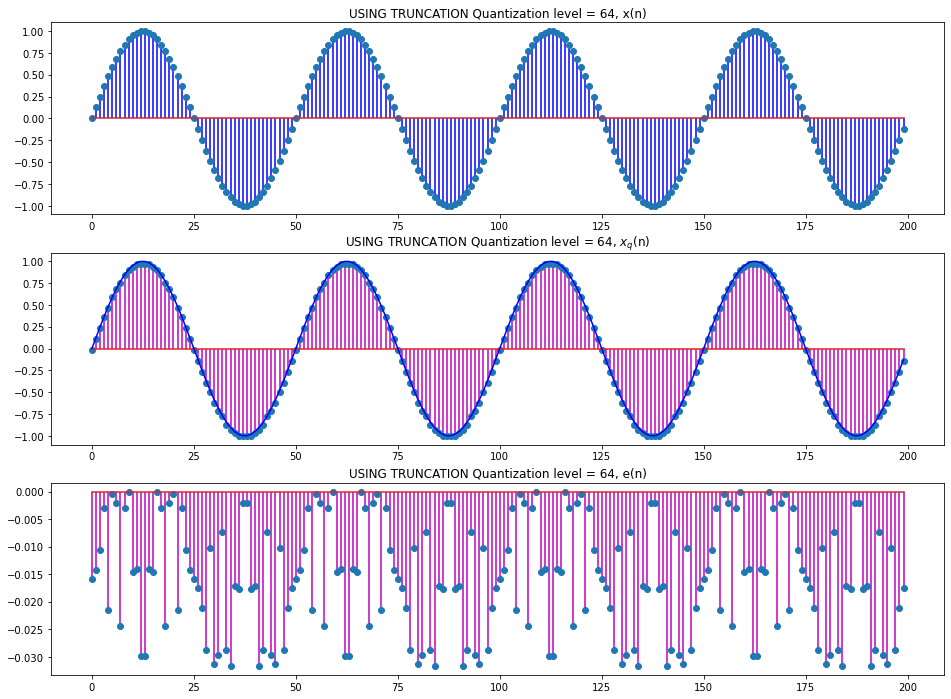

In [4]:
plt.figure(figsize=(16, 12))
quantizeandplot(0, 64)

SQNR = 5478.328531428617


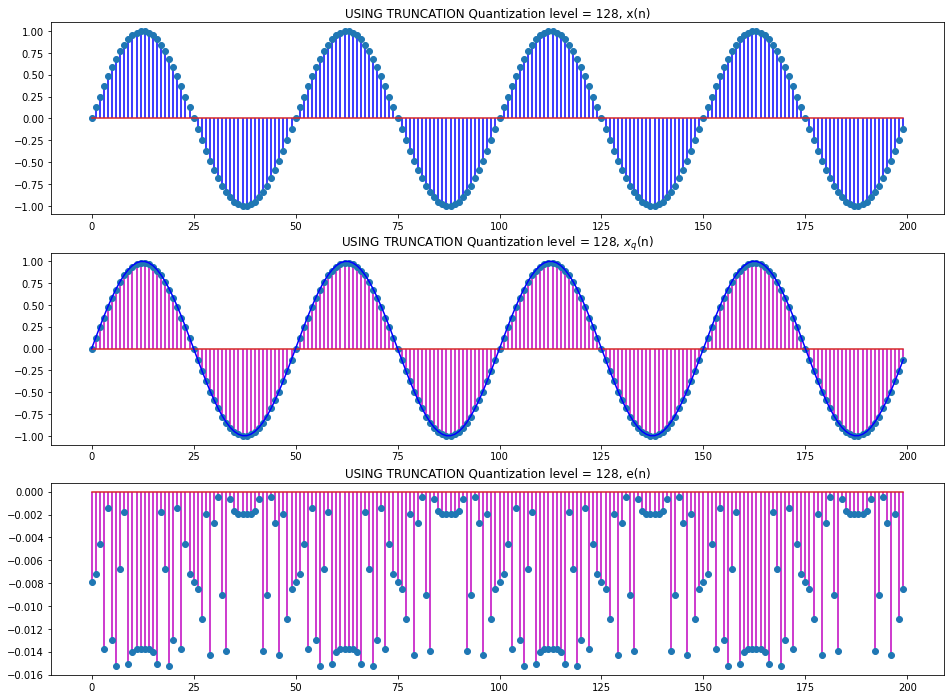

In [11]:
plt.figure(figsize=(16, 12))
quantizeandplot(0, 128)

SQNR = 25554.2153686672


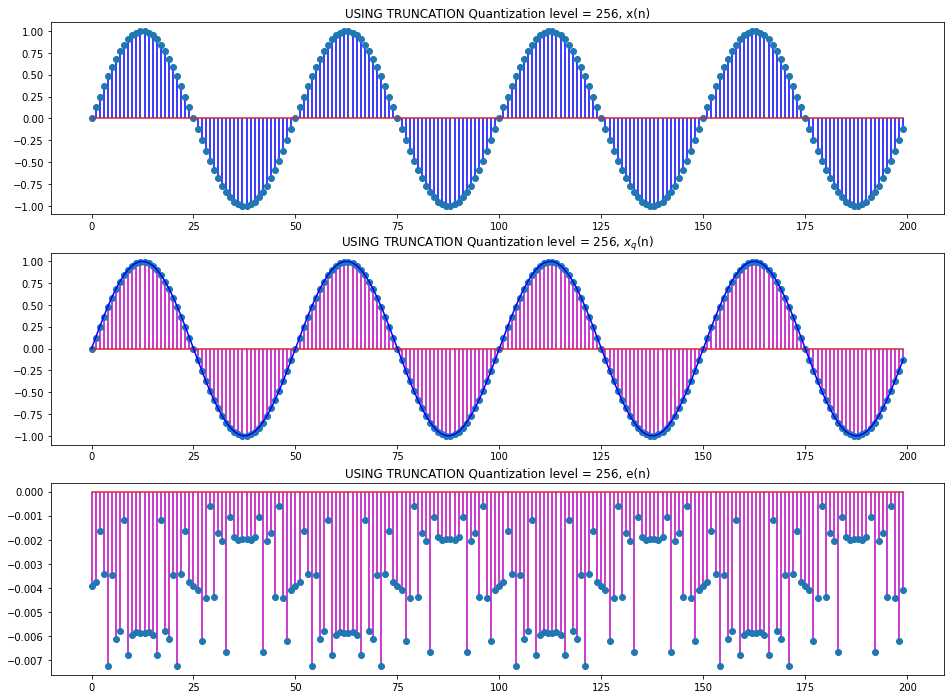

In [12]:
plt.figure(figsize=(16, 12))
quantizeandplot(0, 256)

# Câu b: Repeat part (a) by using ROUNDING instead of TRUNCATION

SQNR = 6039.006470732488


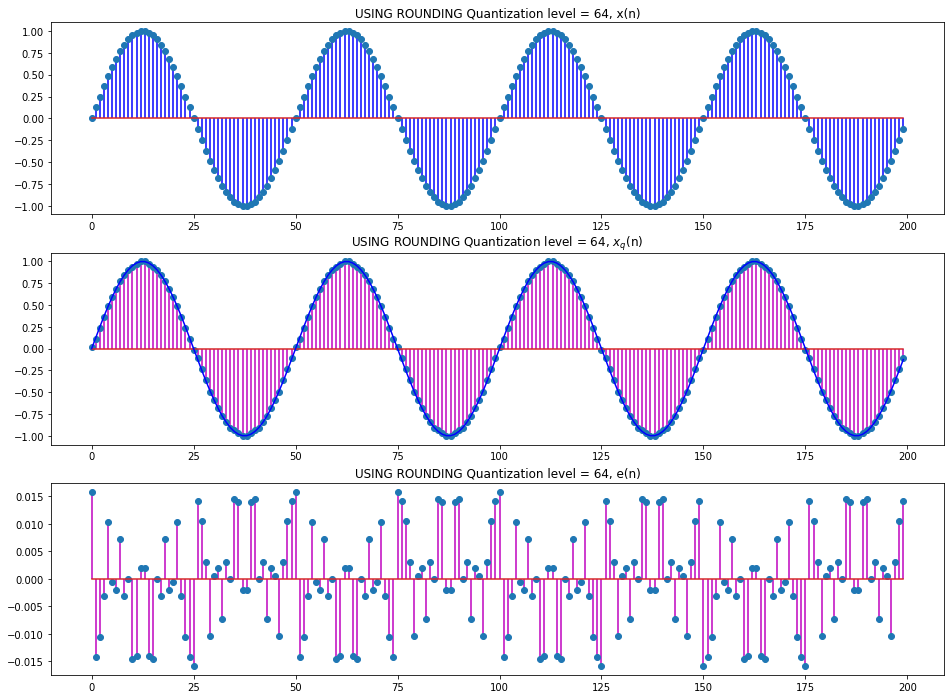

In [13]:
plt.figure(figsize=(16, 12))
quantizeandplot(1, 64)

SQNR = 35152.98998878376


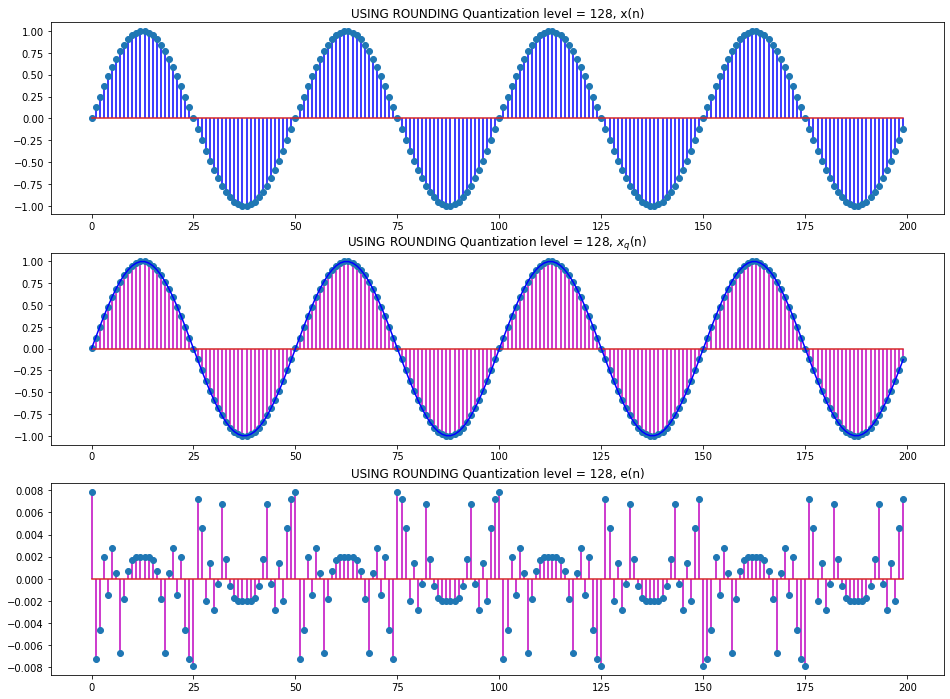

In [14]:
plt.figure(figsize=(16, 12))
quantizeandplot(1, 128)

SQNR = 89500.62332995737


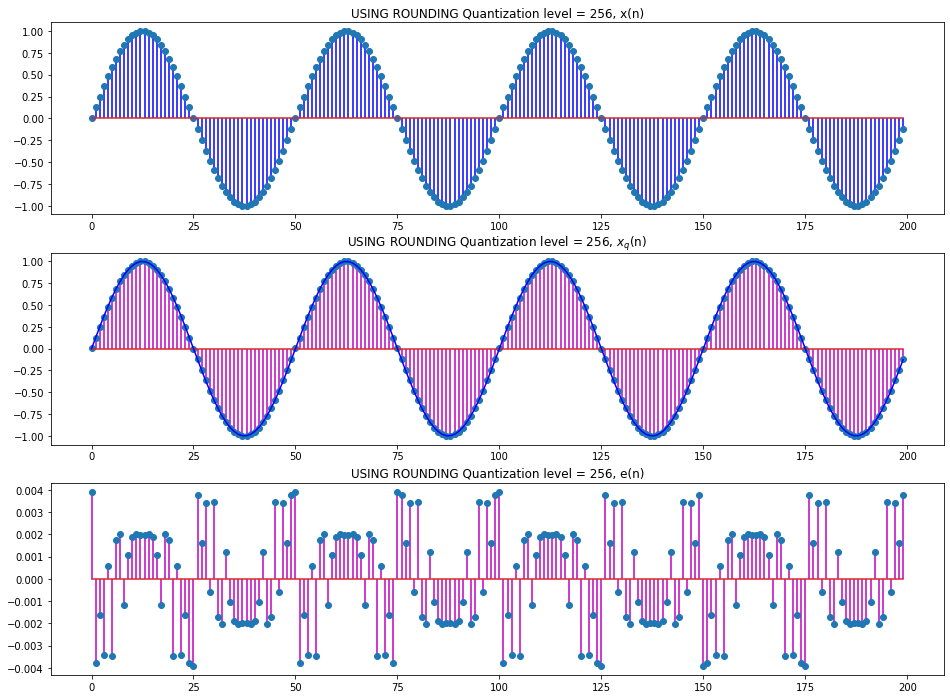

In [15]:
plt.figure(figsize=(16, 12))
quantizeandplot(1, 256)

# câu c